In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[2]


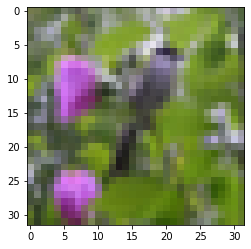

In [7]:
i = 300
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


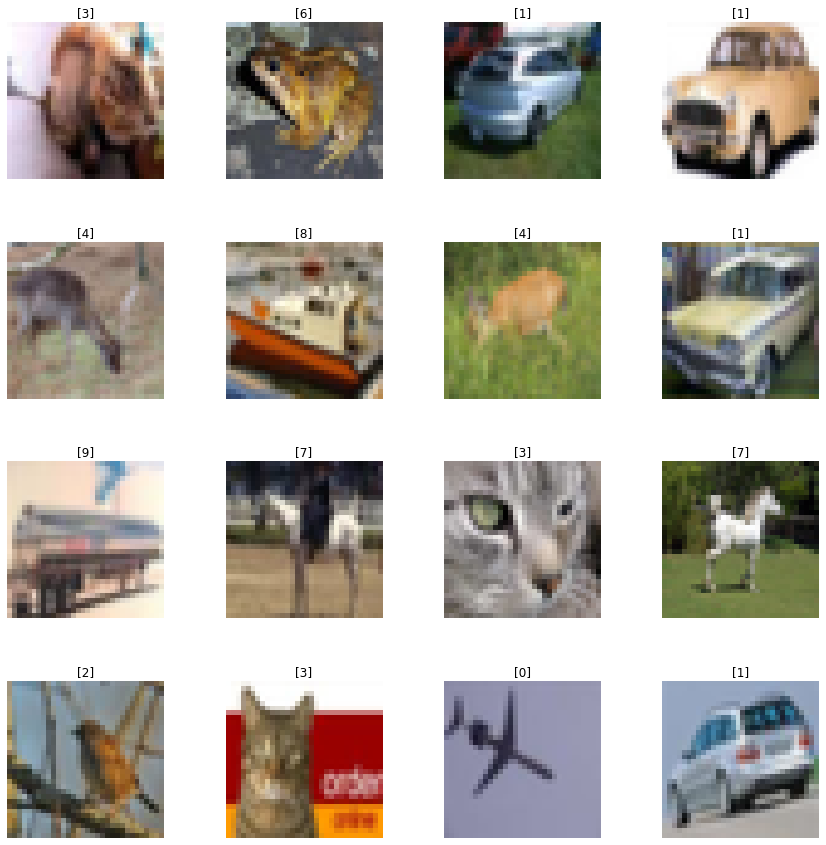

In [8]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid ):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [9]:
n_training

50000

In [10]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
number_cat = 10

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape = X_train.shape[1:]

In [21]:
Input_shape

(32, 32, 3)

In [22]:
y_train.shape

(50000, 10)

In [23]:

cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [24]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])

In [25]:
epochs = 100

history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 147us/sample - loss: 2.0638 - accuracy: 0.2376
Epoch 2/100
50000/50000 [==============================] - 3s 65us/sample - loss: 1.8258 - accuracy: 0.3418
Epoch 3/100
50000/50000 [==============================] - 3s 65us/sample - loss: 1.7248 - accuracy: 0.3752s - loss: 1.7311 - accu
Epoch 4/100
50000/50000 [==============================] - 3s 65us/sample - loss: 1.6531 - accuracy: 0.3978
Epoch 5/100
50000/50000 [==============================] - 3s 65us/sample - loss: 1.5864 - accuracy: 0.4253
Epoch 6/100
50000/50000 [==============================] - 3s 65us/sample - loss: 1.5361 - accuracy: 0.4450
Epoch 7/100
50000/50000 [==============================] - 3s 65us/sample - loss: 1.4923 - accuracy: 0.4577
Epoch 8/100
50000/50000 [==============================] - 3s 66us/sample - loss: 1.4585 - accuracy: 0.4709
Epoch 9/100
50000/50000 [==============================] - 3s 66us/sample - loss: 1.4270 

50000/50000 [==============================] - 3s 68us/sample - loss: 0.6122 - accuracy: 0.7852s -
Epoch 75/100
50000/50000 [==============================] - 3s 67us/sample - loss: 0.6021 - accuracy: 0.7886
Epoch 76/100
50000/50000 [==============================] - 3s 66us/sample - loss: 0.5962 - accuracy: 0.7896s - loss: 0.5938 - ac
Epoch 77/100
50000/50000 [==============================] - 3s 66us/sample - loss: 0.5933 - accuracy: 0.7905
Epoch 78/100
50000/50000 [==============================] - 3s 67us/sample - loss: 0.5793 - accuracy: 0.7962
Epoch 79/100
50000/50000 [==============================] - 3s 66us/sample - loss: 0.5739 - accuracy: 0.7982
Epoch 80/100
50000/50000 [==============================] - 3s 67us/sample - loss: 0.5682 - accuracy: 0.7989
Epoch 81/100
50000/50000 [==============================] - 3s 67us/sample - loss: 0.5602 - accuracy: 0.8022
Epoch 82/100
50000/50000 [==============================] - 3s 66us/sample - loss: 0.5513 - accuracy: 0.8049
Epoch 83

In [26]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.7688999772071838


In [27]:
predicted_classes = cnn.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
y_test = y_test.argmax(1)

In [30]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

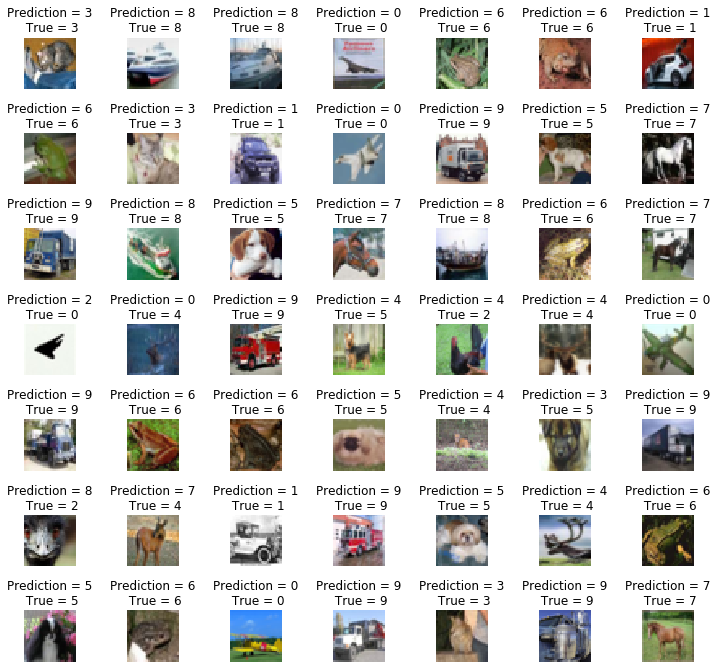

In [31]:
L = 7
W = 7
fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

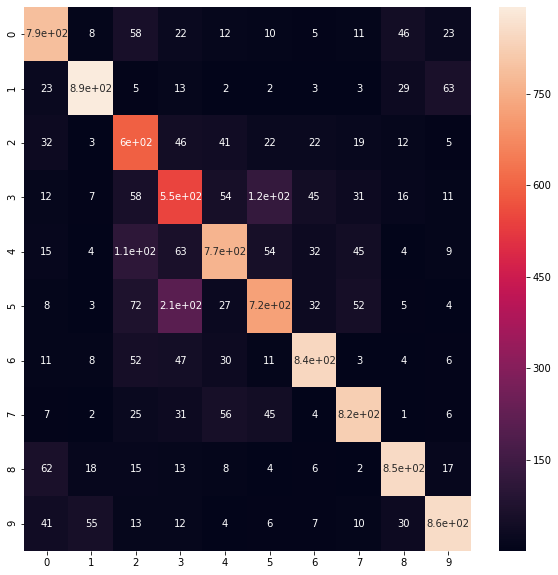

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix( predicted_classes, y_test )
plt.figure( figsize = (10,10))
sns.heatmap(conf_mat, annot = True )